# Exploring categorical variables

## Visualizing two categorical variables

## Import data

In [1]:
import pandas as pd

ROOT = "https://raw.githubusercontent.com/kirenz/modern-statistics/main/data/"
DATA = "loans.csv"

df = pd.read_csv(ROOT + DATA)

df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,mortgage,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,rent,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,rent,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,rent,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,rent,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


In [2]:
df.homeownership = df.homeownership.astype("category")
df.application_type = df.application_type.astype("category")

## Bar plots with two variables

In [3]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Seaborn style
sns.set_theme(style="ticks", color_codes=True)

# Custom colors
blue = "#3F83F4"
blue_dark = "#062089"
blue_light = "#8DC0F6"
blue_lighter = "#BBE4FA"
grey = "#9C9C9C"
grey_dark = "#777777"
grey_light = "#B2B2B2"
orange = "#EF8733"
colors_blue = [blue_dark, blue, blue_light]

### Dodged Bar plot

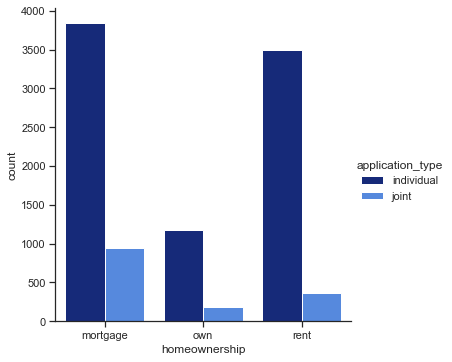

In [4]:
# Dodged bar plot
sns.catplot(x="homeownership", hue="application_type", kind = "count", 
            palette=colors_blue, data=df)

plt.show();

### Stacked bar chart

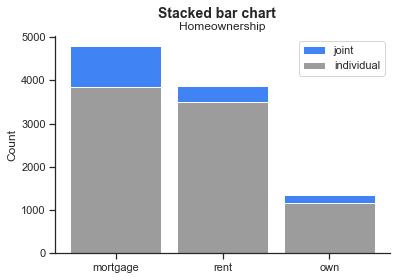

In [5]:
# Stacked bar chart
# Data
joint = df.homeownership[df.application_type=="joint"].value_counts() 
individual = df.homeownership[df.application_type=="individual"].value_counts() 
labels = list(df['homeownership'].value_counts().index)

# Width of the bars: can also be len(x) sequence
width = 0.85

# Create a figure containing a single axes.
fig, ax = plt.subplots()

# Plot data on the axes
ax.bar(labels, joint, width, bottom=individual, color=blue,label='joint')
ax.bar(labels, individual, width, color=grey, label='individual')

# Define labels
ax.set_ylabel('Count')
fig.suptitle('Stacked bar chart', fontsize=14, fontweight='bold')
ax.set_title('Homeownership')

ax.legend()

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.show();

#fig.savefig('img/stacked-bar-chart.png')
#plt.close(fig) 

### Standardized bar plot

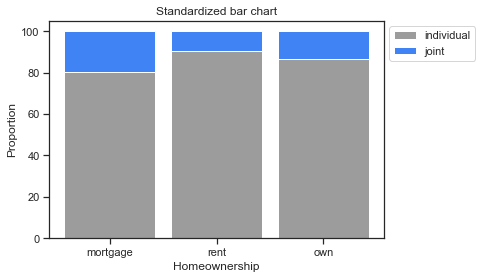

In [6]:
from matplotlib import rc
# Standardized bar plot
# Data
joint = df.homeownership[df.application_type=="joint"].value_counts() 
individual = df.homeownership[df.application_type=="individual"].value_counts() 
labels = list(df['homeownership'].value_counts().index)
r = [0,1,2]
# From raw value to percentage
totals = [i+j for i,j in zip(joint, individual)]
joint_bar = [i / j * 100 for i,j in zip(joint, totals)]
individual_bar = [i / j * 100 for i,j in zip(individual, totals)]
# plot
barWidth = 0.85
plt.bar(r, individual_bar, color=grey, edgecolor='white', width=barWidth, label="individual")
plt.bar(r, joint_bar, bottom=individual_bar, color=blue, edgecolor='white', width=barWidth, label="joint")
# Custom axis
plt.xticks(r, labels)
plt.xlabel("Homeownership")
plt.ylabel("Proportion")
# Add a legend and title
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.title("Standardized bar chart") 
# Save graphic
plt.savefig('img/standard-bar-chart.png')
plt.close(fig) 


<img src="img/standard-bar-chart.png">

## Mosaic plots

In [7]:
from statsmodels.graphics.mosaicplot import mosaic

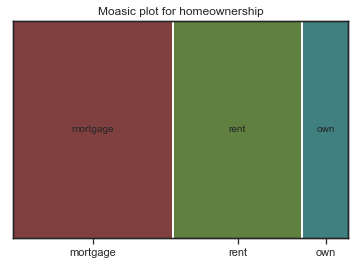

In [8]:
# Mosaic plot for homeownership alone
mosaic(df, ['homeownership'], title='Moasic plot for homeownership')
plt.show();

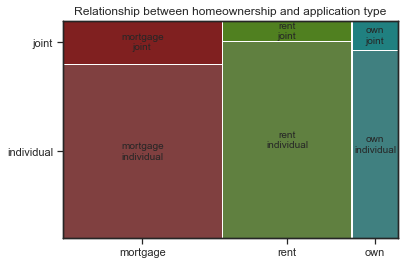

In [9]:
# Mosaic plot for displaying the relationship between homeownership and application type.
mosaic(df, ['homeownership', 'application_type'], title='Relationship between homeownership and application type')
plt.show();

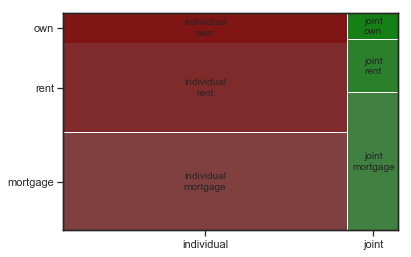

In [10]:
# Mosaic plot where loans are grouped by homeownership 
# after they have been divided into application types.

mosaic(df, ['application_type', 'homeownership'], title='')
plt.show();